# PREPROCESSING

## IMPORTING RELEVANT LIBRARIES

In [25]:
# importing relevant libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tsfel
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## PROCESSING DATA TO CREATE TEST AND TRAIN SETS

In [3]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


# QUESTION 1

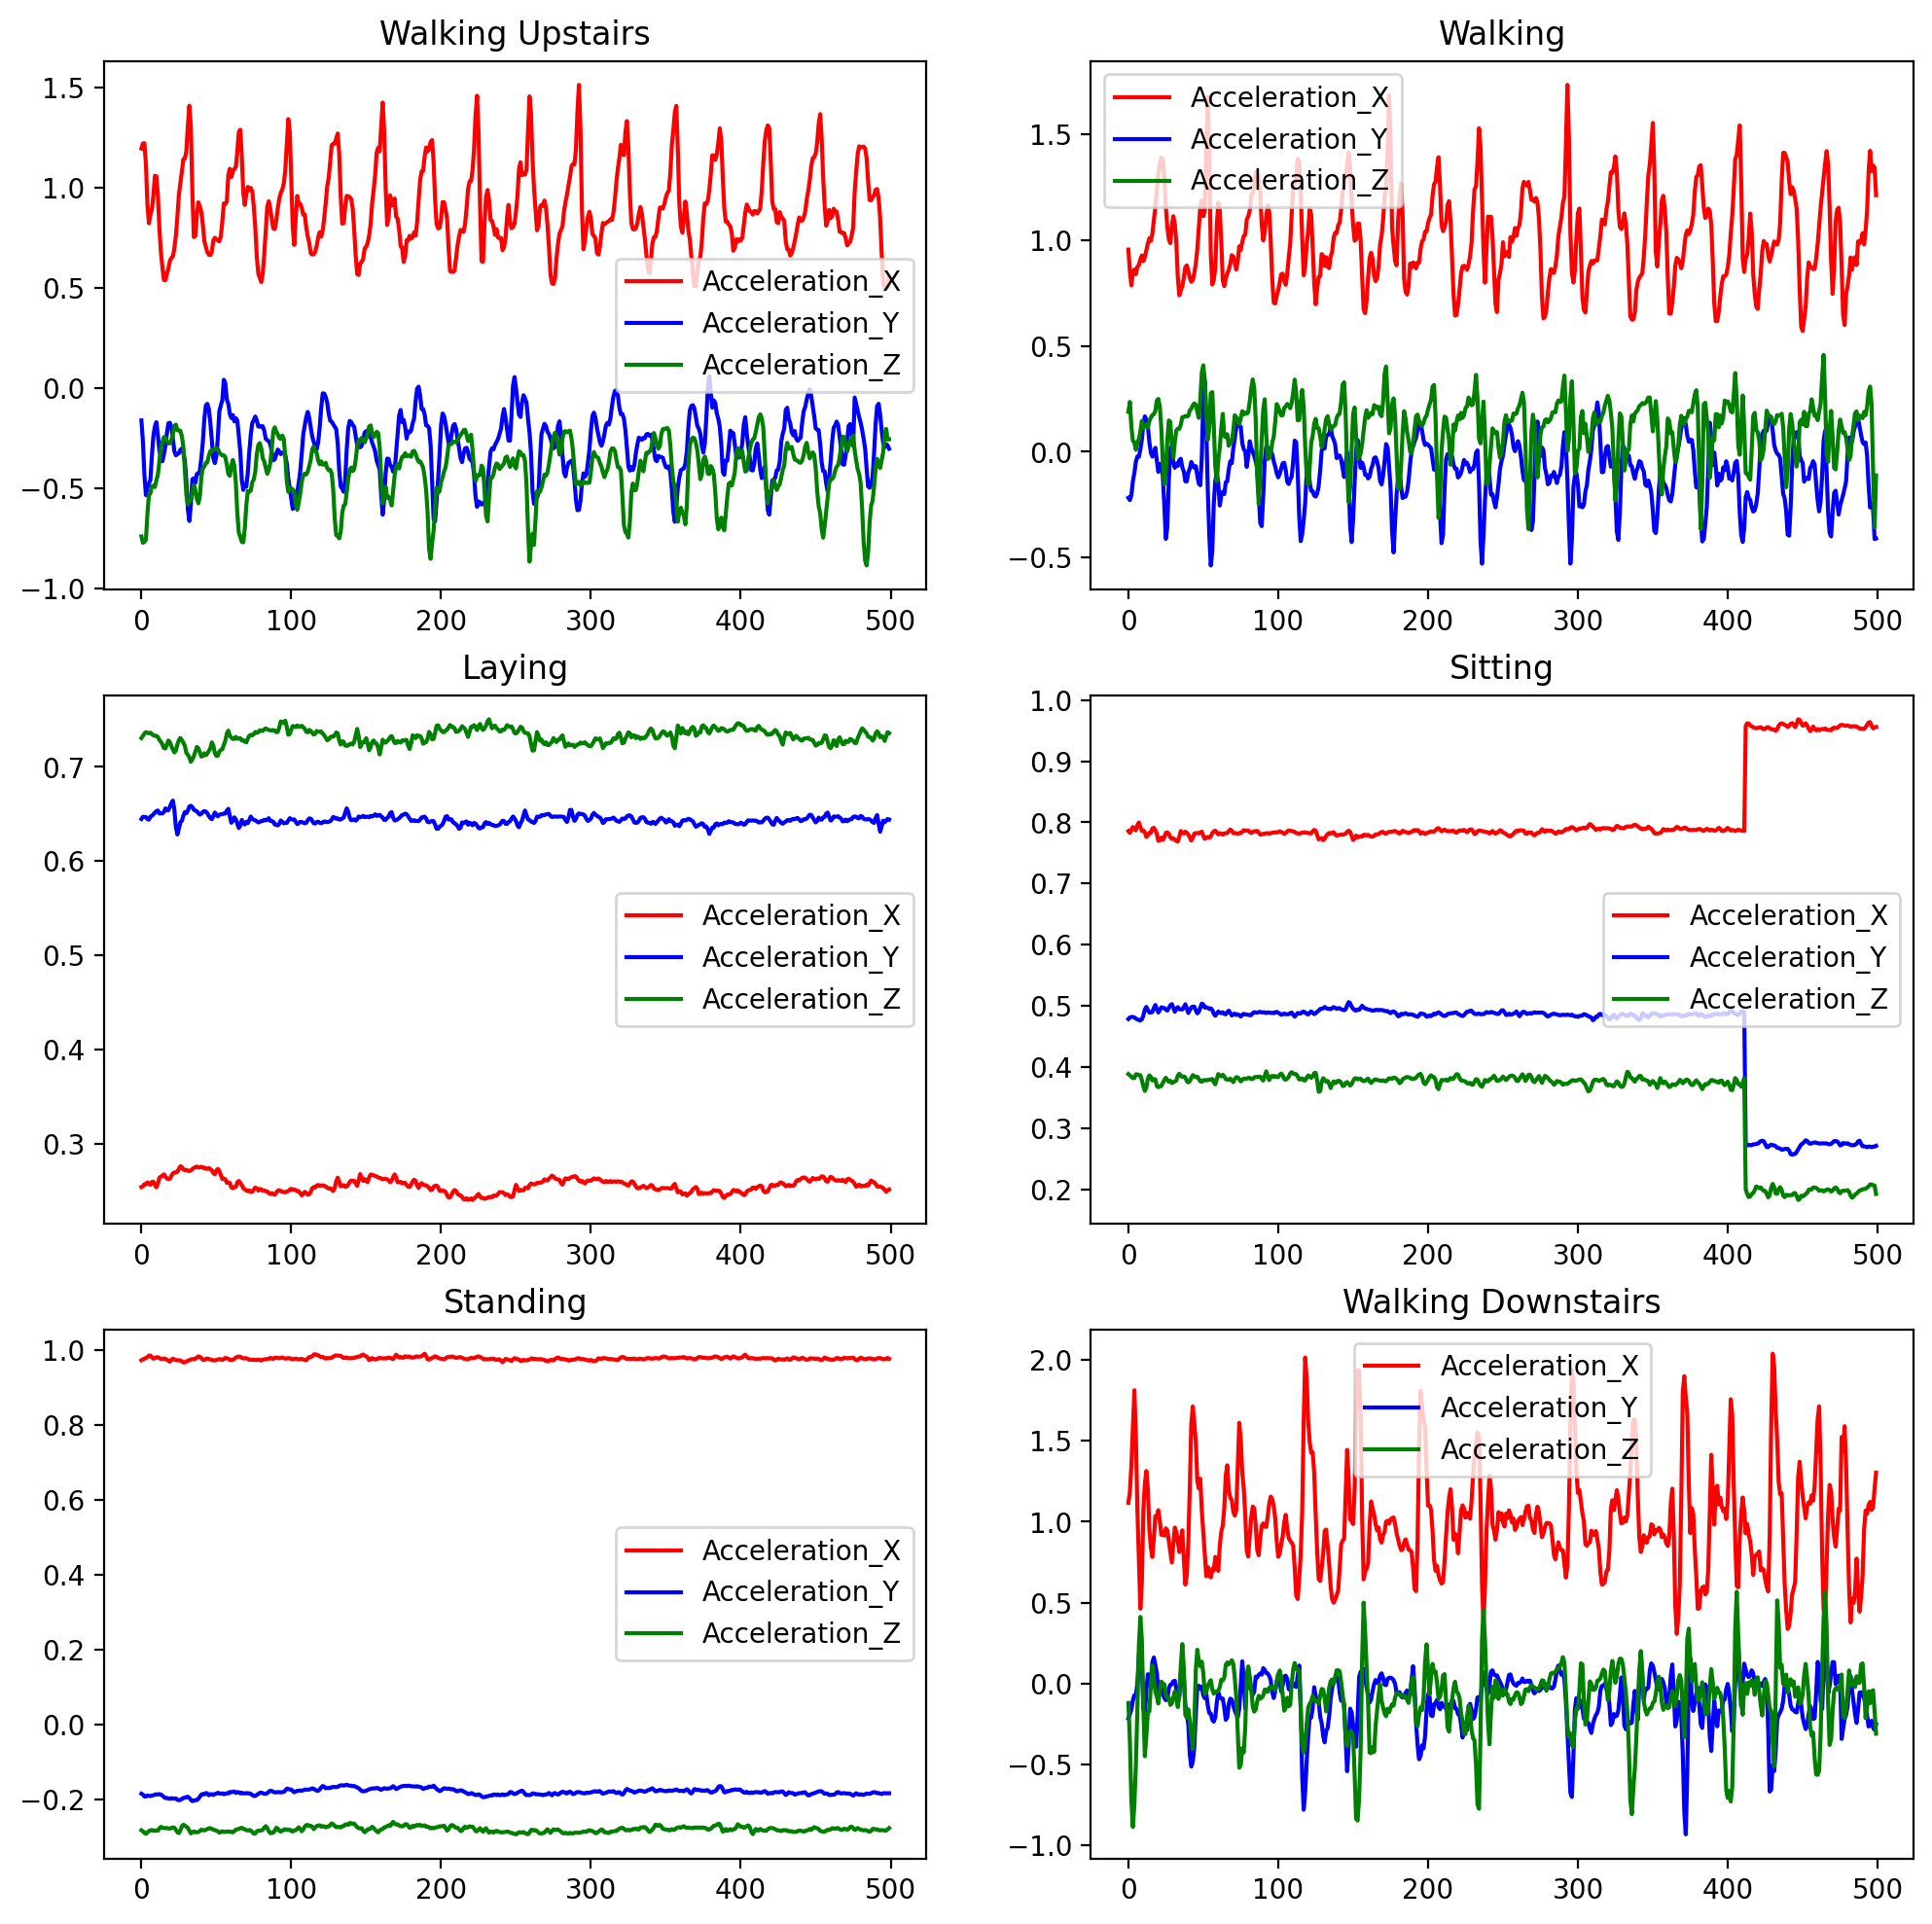

In [34]:
class_names = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs',
               4: 'Sitting', 5: 'Standing', 6: 'Laying'}
class_labels = [1, 2, 3, 4, 5, 6]
figure, axes = plt.subplots(nrows=3,ncols=2,figsize=(12, 12))
plotted = 0
for x in range(126):
    if y_train[x] in class_labels:
        cl = y_train[x] # class label
        class_labels.remove(cl)
        df = pd.DataFrame(X_train[x])
        y = list(range(500))
        axes[plotted%3][plotted//3].plot(y, df[0], color = 'red', label = 'Acceleration_X')
        axes[plotted%3][plotted//3].plot(y, df[1], color = 'blue', label = 'Acceleration_Y')
        axes[plotted%3][plotted//3].plot(y, df[2], color = 'green', label = 'Acceleration_Z')
        axes[plotted%3][plotted//3].set_title(class_names[cl])
        axes[plotted%3][plotted//3].legend()
        plotted+=1

# QUESTION 2

# QUESTION 3

## PART 1 - RAW DATA

### PROCESSING RAW DATA WITH PCA

In [ ]:
# creating an array with values of total acceleration
x_total_acc = np.sum(X_train**2, axis=2)

# standardizing
scaler = StandardScaler()
X_standardized = scaler.fit_transform(x_total_acc)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# naming all activities
class_names = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs',
               4: 'Sitting', 5: 'Standing', 6: 'Laying'}
dynamic_activities = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs'}
static_activities = {4: 'Sitting', 5: 'Standing', 6: 'Laying'}

# colours for each class in raw data, keeping static and dynamic clearly distinguishable
colours_dyn_stat = ["lightcoral", "crimson", "maroon", "lightseagreen", "royalblue", "navy"]

# creating pandas dataframe
x_pca_df = pd.DataFrame(X_pca, columns = ["pca1", "pca2"])
x_pca_df['class'] = y_train

# defining function for scatter plot
def post_pca_scatter_plot(class_dictionary, title, pca_df, colours, edgecolour = None, size = 50):
    plt.figure(figsize=(7, 6))
    for class_value, class_name in class_dictionary.items():  #loop iterating over activities, plotting each
        df = pca_df[pca_df["class"]==class_value]
        plt.scatter(df["pca1"], df["pca2"], color=colours[class_value - 1], label=class_name, edgecolor = edgecolour, s = size)
    # labelling the graph
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(title)
    plt.legend()  # Show the legend with class names
    plt.show()

### SCATTER PLOTS AFTER PROCESSING RAW DATA USING PCA

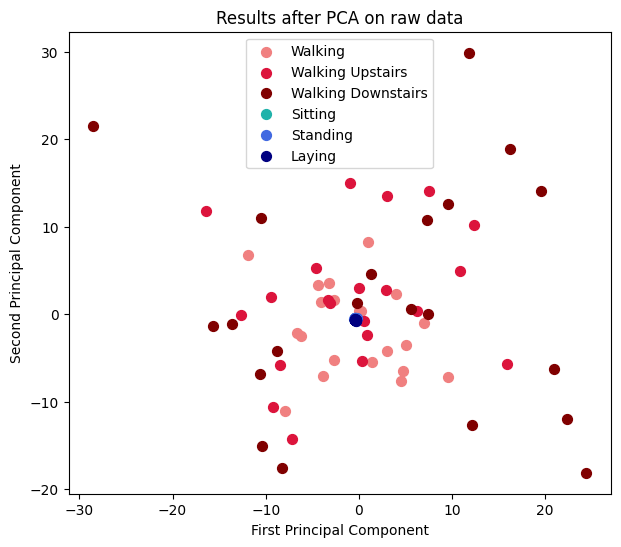

In [ ]:
post_pca_scatter_plot(class_names, "Results after PCA on raw data", x_pca_df, colours_dyn_stat)

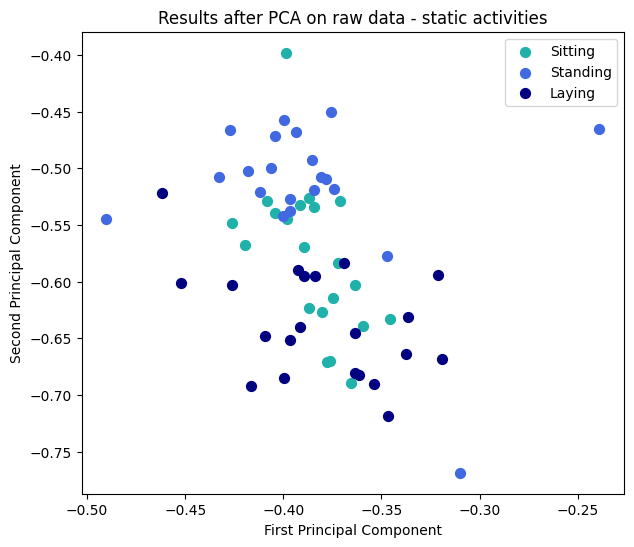

In [ ]:
post_pca_scatter_plot(static_activities, "Results after PCA on raw data - static activities", x_pca_df, colours_dyn_stat)

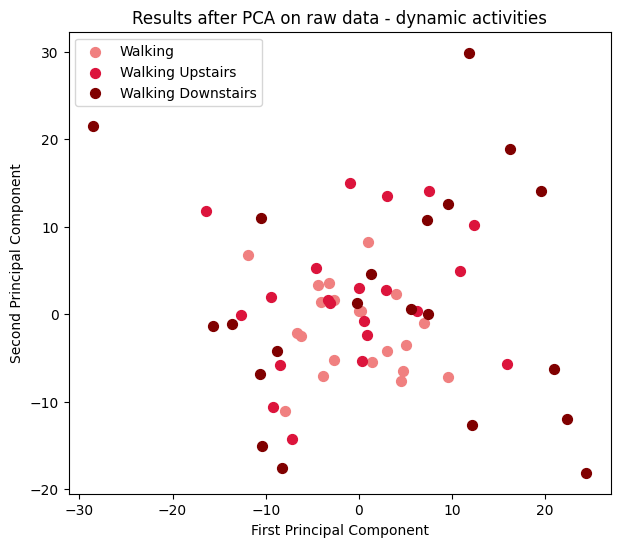

In [ ]:
post_pca_scatter_plot(dynamic_activities, "Results after PCA on raw data - dynamic activities", x_pca_df, colours_dyn_stat)

## PART 2 - TSFEL FEATURES

### EXTRACTING FEATURES USING TSFEL

In [ ]:
# creating a custom configuration from the existing statistical domain configuration
cgf_file = tsfel.get_features_by_domain('statistical')
features = ["Max", "Min","Mean", "Median", "Standard deviation", "Variance", "Kurtosis",
            "Skewness", "Root mean square", "Entropy", ]
for i in cgf_file['statistical'].keys():
    if i not in features:
        cgf_file['statistical'][i]['use'] = 'no'

# creating a dataframe to store info after tsfel feature extraction
x_tsfel = pd.DataFrame(columns = [None]*40)
check_columns = 0

# extracting features for each sample, one column at a time
for x in range(126): # choosing one sample
    x_df = pd.DataFrame(X_train[x], columns = ['acc_x', 'acc_y', 'acc_z']) # creating dataframe for one sample
    x_df['total_acc'] = x_total_acc[x]                                     # each dataframe has 4 columns
    sample_features_row = [] # creating an empty row
    for column in x_df.columns: # traversing through the 4 columns of the dataset
        extracted_features = tsfel.time_series_features_extractor(cgf_file, x_df[column], verbose=0, fs = 50) 
        sample_features_row.extend(extracted_features.iloc[0].values) # extracting the row of values from the
    x_tsfel.loc[x] = sample_features_row # extracted_features dataframe and setting it as a row in x_tsfel
    if check_columns==0:
        # creating column names
        original_columns = extracted_features.columns
        ends = ['_x', '_y', '_z', '_t']
        new_columns = [f"{col}{end}" for col in original_columns for end in ends]
        x_tsfel.columns = new_columns
        check_columns = 1


### PROCESSING DATA EXTRACTED USING TSFEL WITH PCA

In [ ]:
# standardizing the data
scaler = StandardScaler()
tsfel_scaled = scaler.fit_transform(x_tsfel)

# applying pca
pca = PCA(n_components=2)
tsfel_pca = pca.fit_transform(tsfel_scaled)
tsfel_pca = pd.DataFrame(tsfel_pca, columns=['pca1', 'pca2']) # converting back into a dataframe

# adding class labels to the PCA result
tsfel_pca['class'] = y_train

# creating a list of colours to distinguish all classes
colours_sep_classes = ["steelblue", "mediumseagreen", "indianred", "mediumpurple", "khaki", "cadetblue"]
colours_sep_classes = ['navy', 'slateblue', 'teal', 'mediumseagreen', 'yellowgreen', 'yellow']

### SCATTER PLOTS OF TSFEL DATA ANALYSED USING PCA

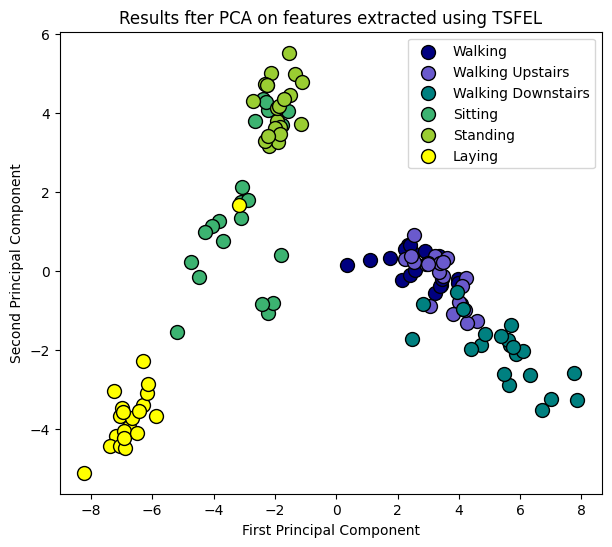

In [ ]:
post_pca_scatter_plot(class_names, "Results fter PCA on features extracted using TSFEL", tsfel_pca, colours_sep_classes, 'k', 100)

## PART 3 - DATASET FEATURES

### IMPORTING OTHER FEATURES FROM DATASET

In [ ]:
from Gyro_MakeDataset import Gyro_X_train, Gyro_y_train
from Body_MakeDataset import Body_X_train, Body_y_train

Training data shape:  (94, 500, 3)
Testing data shape:  (41, 500, 3)
Training data shape:  (94, 500, 3)
Testing data shape:  (41, 500, 3)


### PROCESSING DATA WITH PCA

In [ ]:
# creating new dataframe with body acc and gyro features
gyro_train = Gyro_X_train.reshape(94, -1)
body_train = Body_X_train.reshape(94, -1)
body_gyro = np.concatenate((gyro_train, body_train), axis = 1)

# standardizing
body_gyro_standardized = scaler.fit_transform(body_gyro)

# pca
body_gyro_pca = pca.fit_transform(body_gyro_standardized)

# creating dataframe with class labels
body_gyro_pca_df = pd.DataFrame(body_gyro_pca, columns = ['pca1', 'pca2'])
body_gyro_pca_df['class'] = Body_y_train


### SCATTER PLOTS OF DATASET FEATURES ANALYSED USING PCA

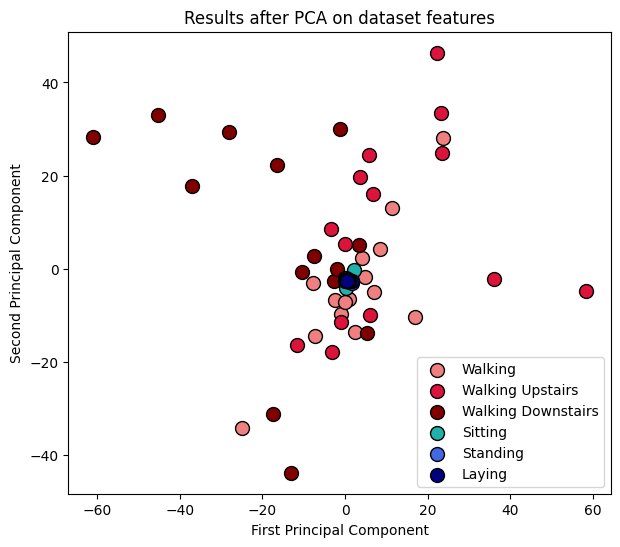

In [ ]:
post_pca_scatter_plot(class_names, "Results after PCA on dataset features", body_gyro_pca_df, colours_dyn_stat, 'k', 100)

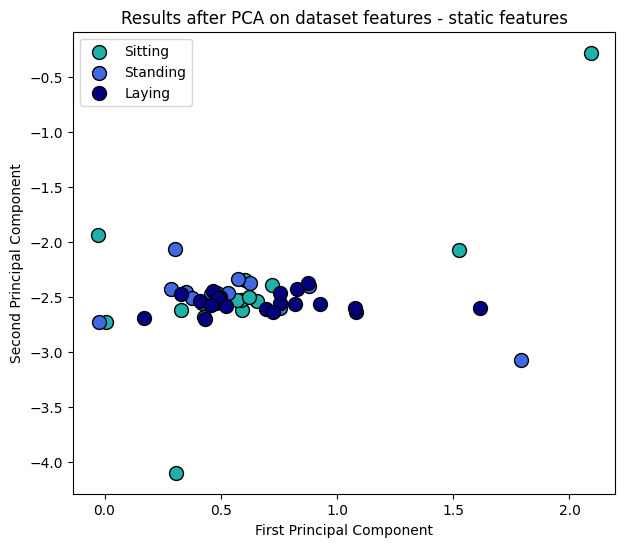

In [ ]:
post_pca_scatter_plot(static_activities, "Results after PCA on dataset features - static features", body_gyro_pca_df, colours_dyn_stat, 'k', 100)

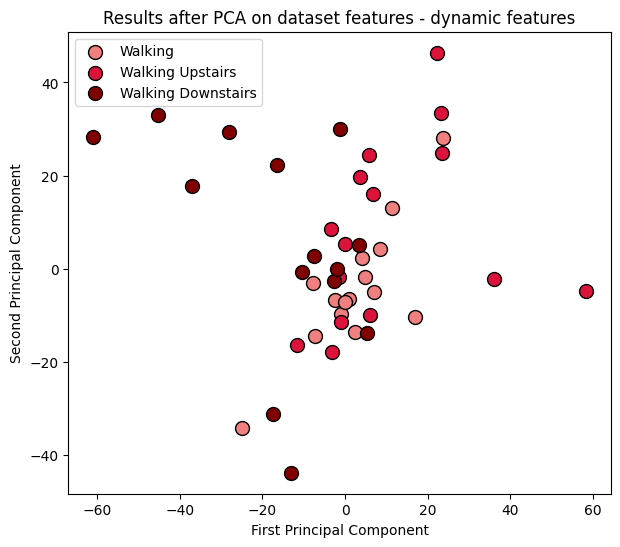

In [ ]:
post_pca_scatter_plot(dynamic_activities, "Results after PCA on dataset features - dynamic features", body_gyro_pca_df, colours_dyn_stat, 'k', 100)

## PART 4 - COMPARING THE RESULTS

All three result sets can be used for distinguishing between static and dynamic activites but the only one that allows one to distinguish between all 6 activities is the one obtained after performing PCA on features extracted using TSFEL. Therfore, the second method is best for visualizing the data.

## QUESTION 4